In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score




In [2]:
# Set the directory for the test dataset
test_data_path = 'flower_species_classification/'


In [3]:

# Load the test dataset
X_test = np.load(test_data_path + 'data_test.npy').T  # Transpose the data
y_test = np.load(test_data_path + 'labels_test.npy')



In [4]:
# Normalize the test data (same as training data normalization)
X_test = X_test / 255.0

# Reshape the test data to (num_samples, 300, 300, 3)
X_test = X_test.reshape(-1, 300, 300, 3)



In [5]:
# Load the saved model
model = load_model('mobilenetv2_model.h5')  # Ensure this matches the saved model file

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels



13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step


In [6]:
# Calculate the testing accuracy
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Testing Accuracy: {test_accuracy:.4f}")



Testing Accuracy: 0.9253


In [7]:
# Optionally, print confusion matrix or classification report
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87        48
         1.0       0.91      0.98      0.95        44
         2.0       0.82      0.80      0.81        46
         3.0       1.00      1.00      1.00        36
         4.0       0.97      0.84      0.90        45
         5.0       0.97      0.97      0.97        40
         6.0       0.98      0.98      0.98        43
         7.0       1.00      0.97      0.99        37
         8.0       0.97      0.97      0.97        32
         9.0       0.79      0.95      0.87        44

    accuracy                           0.93       415
   macro avg       0.93      0.93      0.93       415
weighted avg       0.93      0.93      0.93       415


Confusion Matrix:
[[40  0  0  0  0  0  0  0  0  8]
 [ 0 43  1  0  0  0  0  0  0  0]
 [ 2  3 37  0  1  0  1  0  0  2]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  1  5  0 38  0  0  0  0  1]
 [ 1  0  0  0  0 39  0  0  0  0]


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 290ms/step


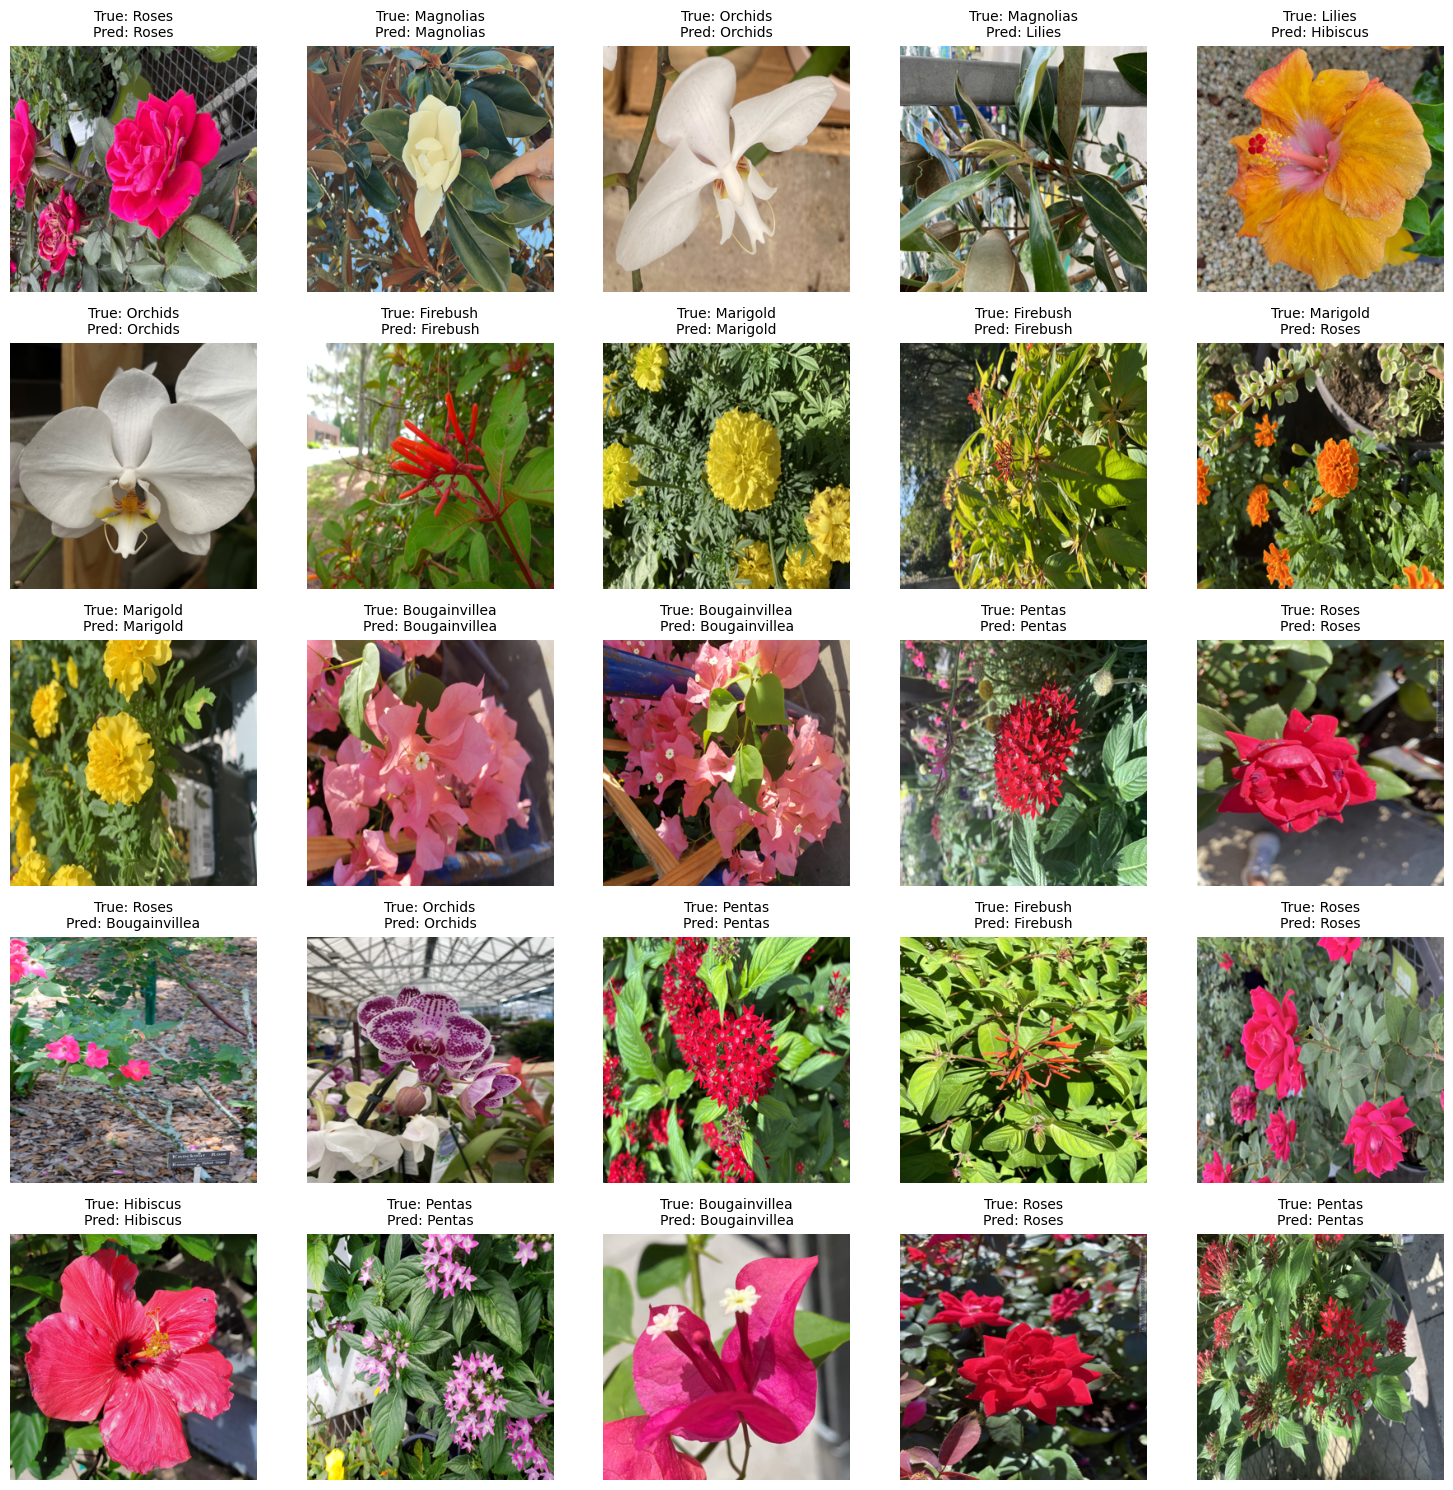

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Set the directory for the test dataset
test_data_path = 'flower_species_classification/'

# Load the test dataset
X_test = np.load(test_data_path + 'data_test.npy').T  # Transpose the data
y_test = np.load(test_data_path + 'labels_test.npy').astype(int)  # Convert to integers

# Normalize the test data (same as training data normalization)
X_test = X_test / 255.0

# Reshape the test data to (num_samples, 300, 300, 3)
X_test = X_test.reshape(-1, 300, 300, 3)

# Load the saved model
model = load_model('mobilenetv2_model_flower.h5')  # Ensure this matches the saved model file

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Class names for display (update if your classes differ)
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids',
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

# Visualize predictions
def visualize_predictions(images, true_labels, pred_labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        true_class = class_names[int(true_labels[i])]  # Convert to int here
        pred_class = class_names[int(pred_labels[i])]  # Convert to int here
        plt.title(f"True: {true_class}\nPred: {pred_class}", fontsize=10)
    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_predictions(X_test, y_test, y_pred_classes, class_names, num_samples=25)


**Prediction using YOLO**

In [84]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.1/899.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 12.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 11.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
Note: you may need to restart the kernel to use updated packages.


In [85]:
from ultralytics import YOLO

# Load the pre-trained YOLO model
model = YOLO("yolov8n.pt")  # You can replace "yolov8n.pt" with "yolov8s.pt" or "yolov8m.pt"


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/varunvemuri/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 11.8MB/s]


In [86]:
import cv2
import matplotlib.pyplot as plt

def run_yolo_inference(image_path):
    # Predict with YOLO
    results = model(image_path)  # Inference on the image

    # Display results
    for result in results:
        # Plot predictions
        result.plot()
        plt.show()

# Example: Predict on a single test image
run_yolo_inference("car_detection_dataset/testing_images/vid_5_26580.jpg")



image 1/1 /Users/varunvemuri/Downloads/ML_Project3/car_detection_dataset/testing_images/vid_5_26580.jpg: 384x640 1 car, 31.5ms
Speed: 1.7ms preprocess, 31.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


In [87]:
def process_yolo_predictions(results, classes_to_detect=['car']):
    """
    Process YOLO predictions and filter for specified classes.
    """
    predictions = []
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
        confs = result.boxes.conf.cpu().numpy()  # Confidence scores
        class_ids = result.boxes.cls.cpu().numpy()  # Class IDs
        
        for box, conf, class_id in zip(boxes, confs, class_ids):
            class_name = model.names[int(class_id)]
            if class_name in classes_to_detect:
                predictions.append({"class": class_name, "confidence": conf, "bbox": box})
    
    return predictions



image 1/1 /Users/varunvemuri/Downloads/ML_Project3/car_detection_dataset/testing_images/vid_5_26580.jpg: 384x640 1 car, 37.7ms
Speed: 0.8ms preprocess, 37.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


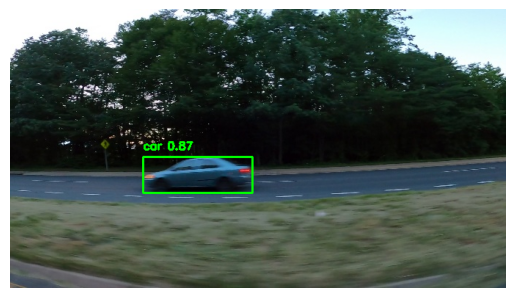

In [89]:
def visualize_yolo_predictions(image_path, predictions):
    # Load image
    img = cv2.imread(image_path)
    for pred in predictions:
        x_min, y_min, x_max, y_max = map(int, pred["bbox"])
        confidence = pred["confidence"]
        class_name = pred["class"]
        
        # Draw bounding box
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        cv2.putText(img, f"{class_name} {confidence:.2f}", (x_min, y_min - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Example: Run and visualize predictions
image_path = "car_detection_dataset/testing_images/vid_5_26580.jpg"
results = model(image_path)
predictions = process_yolo_predictions(results)
visualize_yolo_predictions(image_path, predictions)


In [94]:
if len(predictions) == 0:
    print("No car detected in the image.")



image 1/1 /Users/varunvemuri/Downloads/ML_Project3/car_detection_dataset/testing_images/vid_5_26580.jpg: 384x640 1 car, 53.3ms
Speed: 5.3ms preprocess, 53.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Predictions for car_detection_dataset/testing_images/vid_5_26580.jpg: [{'class': 'car', 'confidence': 0.8711668, 'bbox': array([     181.82,      201.71,      330.41,      250.48], dtype=float32)}]


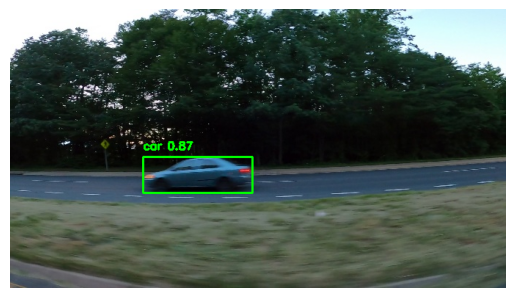


image 1/1 /Users/varunvemuri/Downloads/ML_Project3/car_detection_dataset/testing_images/vid_5_26620.jpg: 384x640 1 car, 47.6ms
Speed: 1.0ms preprocess, 47.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Predictions for car_detection_dataset/testing_images/vid_5_26620.jpg: [{'class': 'car', 'confidence': 0.8534542, 'bbox': array([     237.93,      197.94,      405.72,      248.57], dtype=float32)}]


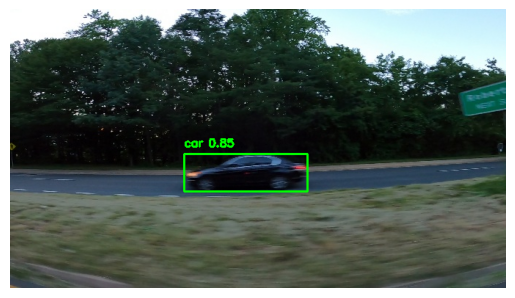


image 1/1 /Users/varunvemuri/Downloads/ML_Project3/car_detection_dataset/testing_images/vid_5_27920.jpg: 384x640 1 car, 43.8ms
Speed: 1.0ms preprocess, 43.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Predictions for car_detection_dataset/testing_images/vid_5_27920.jpg: [{'class': 'car', 'confidence': 0.8786383, 'bbox': array([     145.07,      182.41,      291.57,      241.36], dtype=float32)}]


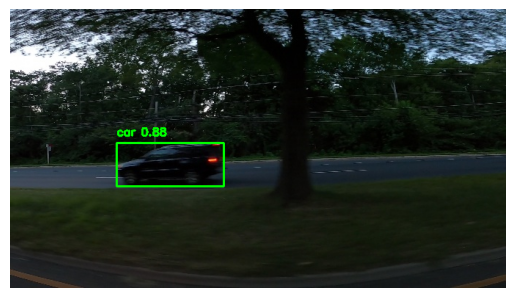

In [96]:
test_image_paths = [
    "car_detection_dataset/testing_images/vid_5_26580.jpg",
    "car_detection_dataset/testing_images/vid_5_26620.jpg",
    "car_detection_dataset/testing_images/vid_5_27920.jpg"
]

for image_path in test_image_paths:
    results = model(image_path)
    predictions = process_yolo_predictions(results)
    print(f"Predictions for {image_path}: {predictions}")
    visualize_yolo_predictions(image_path, predictions)
